In [ ]:
pip install camb

In [ ]:
# Copiando as informações que tem no tutorial
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.5.0 installed at /usr/local/lib/python3.10/dist-packages/camb


In [ ]:
# As informações apresentadas na lista:
h = 0.68
omcdm = 0.26
omb = 0.05
oml = 0.69

## Questão 3:

Compute the angular power spectrum of source number counts (Cl) at z = 1.0 for
a source population with a clustering bias b = 2.0. Assume lmax = 200 and a Gaussian window function, as in the demo notebook. Repeat this calculation for a window function as in the demo notebook - block 40 in the jupyter notebook demo. Compare the results.

In [ ]:
lmax = 200
z = 1.0
b = 2.0
k = np.logspace(-4, 1, 200)

In [ ]:
pars = camb.CAMBparams()
pars.set_cosmology(H0 = 68, ombh2 = omb * h**2, omch2 = omcdm * h**2)
pars.InitPower.set_params(As = 2.1e-9, ns = 0.96, r = 0)
pars.set_for_lmax(lmax, lens_potential_accuracy=0)
pars.set_dark_energy(w = -1.0)

class: <CAMBparams>
 WantCls = True
 WantTransfer = False
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_none
 Transfer: <TransferParams>
   high_precision = False
   accurate_massive_neutrinos = False
   kmax = 0.9
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 350
 max_l_tensor = 600
 max_eta_k = 875.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.023120000000000005
 omch2 = 0.12022400000000003
 omk = 0.0
 omnuh2 = 0.000644866570625114
 H0 = 68.0
 TCMB = 2.7255
 YHe = 0.24617091345456754
 num_nu_massless = 2.0293333333333337
 num_nu_massive = 1
 nu_mass_eigenstates = 1
 share_delta_neff = False
 nu_mass_degeneracies = [1.0146666666666666]
 nu_mass_fractions = [1.0]
 nu_mass_numbers = [1]
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_rpi

In [ ]:
#Get angular power spectrum for galaxy number counts and lensing
from camb.sources import GaussianSourceWindow, SplinedSourceWindow

In [ ]:
#set Want_CMB to true if you also want CMB spectra or correlations
pars.Want_CMB = False
#NonLinear_both or NonLinear_lens will use non-linear corrections
pars.NonLinear = model.NonLinear_both
#Set up W(z) window functions, later labelled W1, W2. Gaussian here.
pars.SourceWindows = [GaussianSourceWindow(redshift = z, source_type='counts', bias = b, sigma = 0.04, dlog10Ndm = 0)]

In [ ]:
#power spectrun
pars.set_matter_power(redshifts=[z], kmax=1000)
results = camb.get_results(pars)
kh, a , PK = results.get_matter_power_spectrum(minkh=1e-1, maxkh=1, npoints=200) # coloquei 'a' pq já tem um z definido

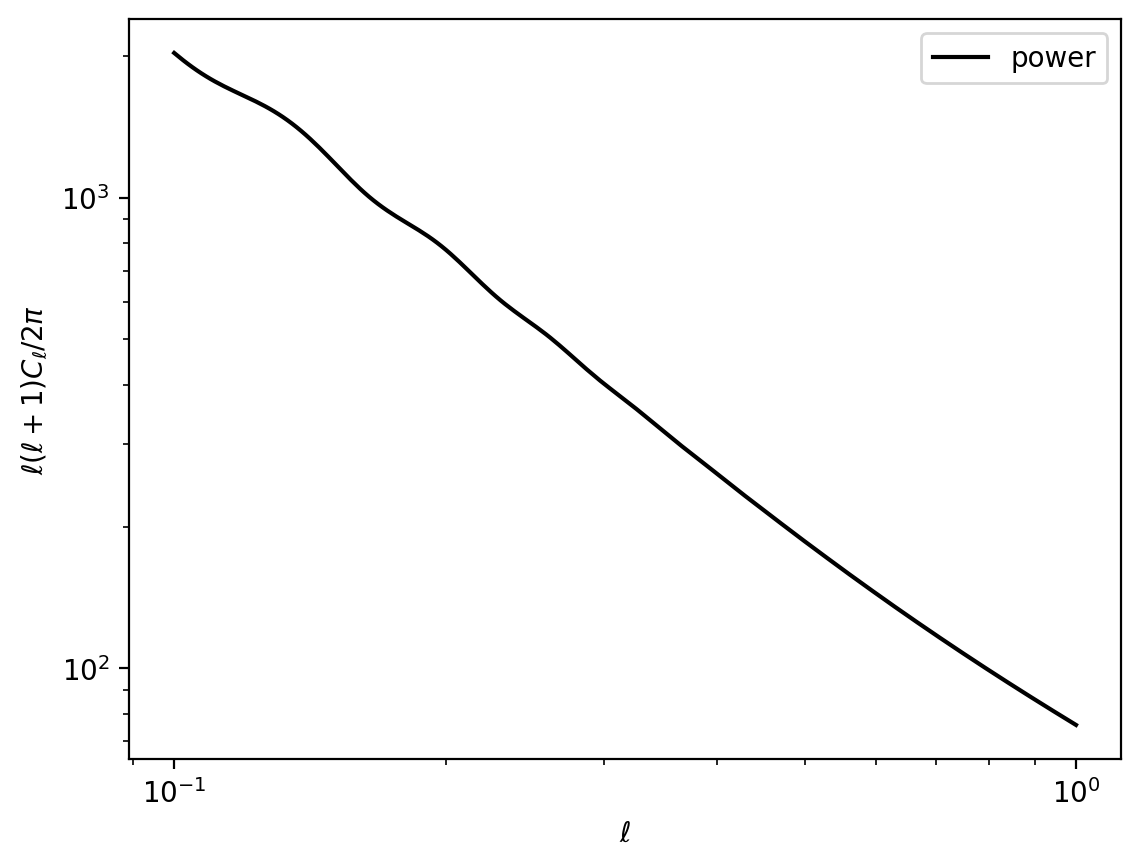

In [ ]:
for i, (redshift, line) in enumerate(zip(a,['-','--'])):
    plt.loglog(kh, PK[i,:], color='k', ls = line)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$')
plt.legend(['power']);

window function

In [ ]:
results = camb.get_results(pars)
cls = results.get_source_cls_dict()
ls=  np.arange(2, lmax+1)

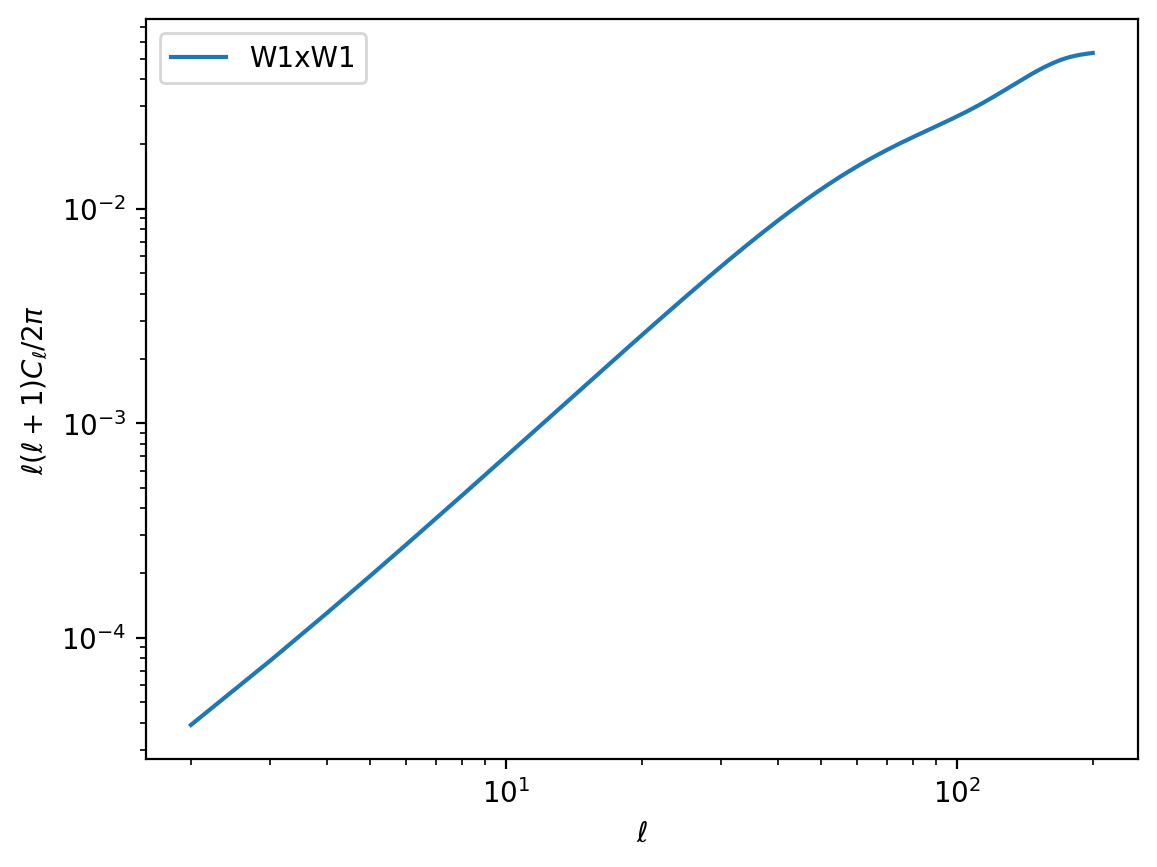

In [ ]:
for spectrum in ['W1xW1']:
    plt.loglog(ls, cls[spectrum][2:lmax+1], label=spectrum)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$')
plt.legend();

Text(0, 0.5, '$\\ell(\\ell+1)C_\\ell/2\\pi$')

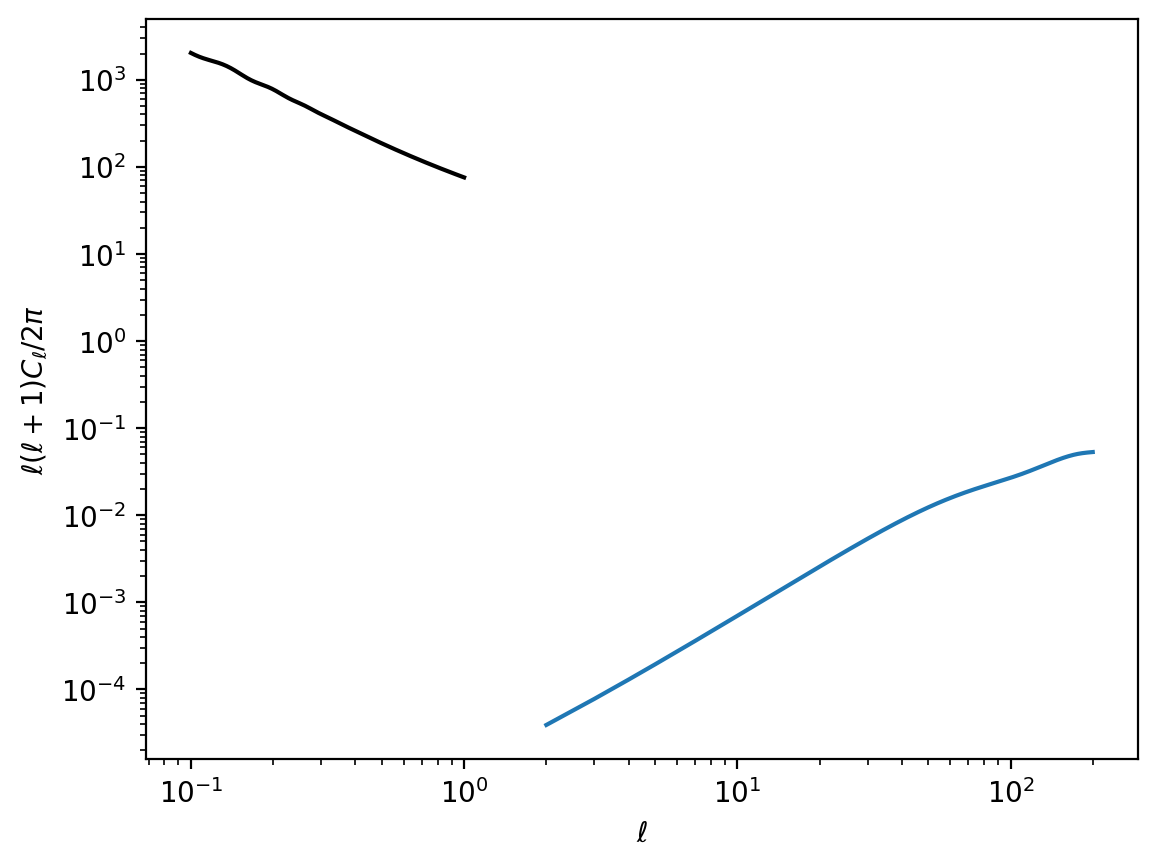

In [ ]:
for i, (redshift, line) in enumerate(zip(a,['-','--'])):
    plt.loglog(kh, PK[i,:], color='k', ls = line)
for spectrum in ['W1xW1']:
    plt.loglog(ls, cls[spectrum][2:lmax+1], label=spectrum)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$')

In [ ]:
# resultou em algo bastante diferente, não sei o que fiz de errado. tentei diferentes formas e isso foi o melhor que consegui

## Questão 4
Same as exercise 3, but for z = 0.3 and z = 2.0. In addition, keep z = 1.0 but change the bias to b = 1.0 and b = 3.0. Show how these results change with respect to exercise 3.

In [ ]:
z2 = 0.3
z3 = 2.0
b2 = 1.0
b3 = 3.0
# pensei em definir uma função, mas fiquei com medo de me embolar

In [ ]:
pars = camb.CAMBparams()
pars.set_cosmology(H0 = 68, ombh2 = omb * h**2, omch2 = omcdm * h**2)
pars.InitPower.set_params(As = 2.1e-9, ns = 0.96, r = 0)
pars.set_for_lmax(lmax, lens_potential_accuracy=0)
pars.set_dark_energy(w = -1.0)

class: <CAMBparams>
 WantCls = True
 WantTransfer = False
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_none
 Transfer: <TransferParams>
   high_precision = False
   accurate_massive_neutrinos = False
   kmax = 0.9
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 350
 max_l_tensor = 600
 max_eta_k = 875.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.023120000000000005
 omch2 = 0.12022400000000003
 omk = 0.0
 omnuh2 = 0.000644866570625114
 H0 = 68.0
 TCMB = 2.7255
 YHe = 0.24617091345456754
 num_nu_massless = 2.0293333333333337
 num_nu_massive = 1
 nu_mass_eigenstates = 1
 share_delta_neff = False
 nu_mass_degeneracies = [1.0146666666666666]
 nu_mass_fractions = [1.0]
 nu_mass_numbers = [1]
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_rpi

In [ ]:
#set Want_CMB to true if you also want CMB spectra or correlations
pars.Want_CMB = False
#NonLinear_both or NonLinear_lens will use non-linear corrections
pars.NonLinear = model.NonLinear_both
#Set up W(z) window functions, later labelled W1, W2. Gaussian here.
pars.SourceWindows = [GaussianSourceWindow(redshift = z2, source_type='counts', bias = b, sigma = 0.04, dlog10Ndm = 0)]

In [ ]:
#power spectrun
pars.set_matter_power(redshifts=[z2], kmax=1000)
results = camb.get_results(pars)
kh2, a2 , PK2 = results.get_matter_power_spectrum(minkh=1e-1, maxkh=1, npoints=200) # coloquei 'a' pq já tem um z definido

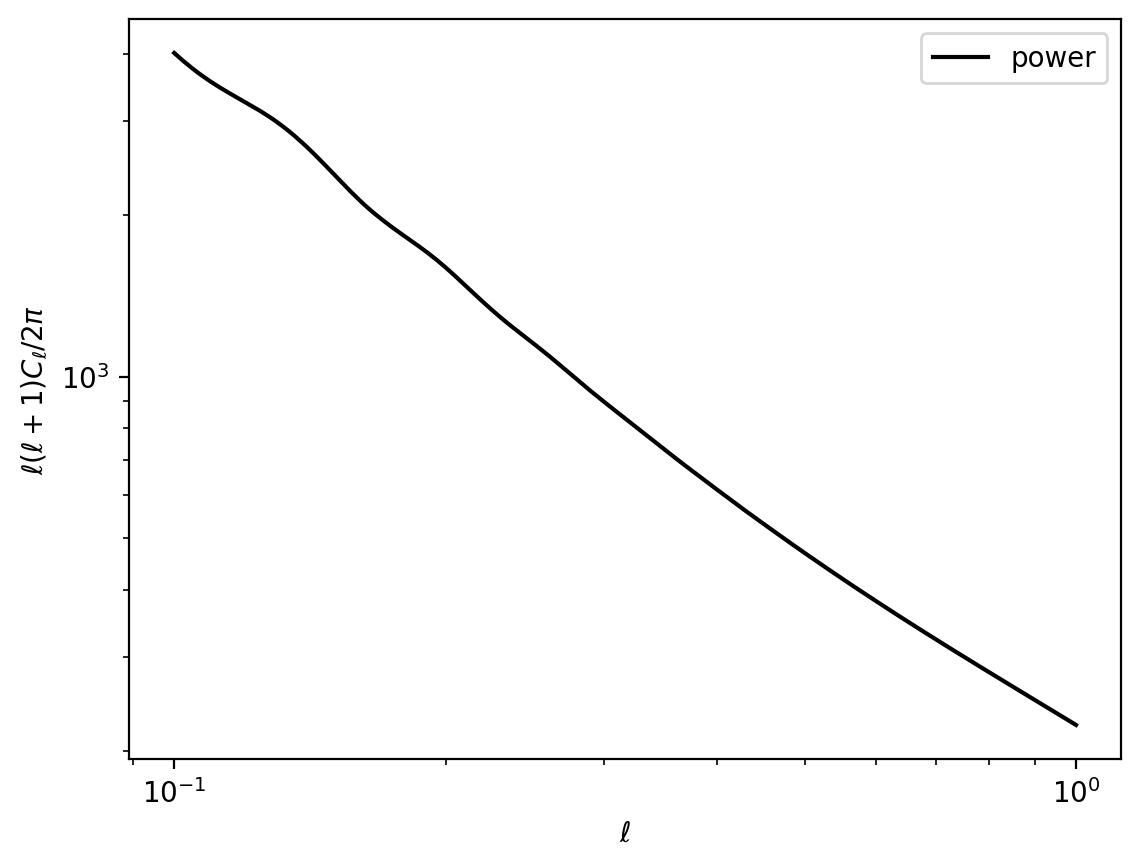

In [ ]:
for i, (redshift, line) in enumerate(zip(a2,['-','--'])):
    plt.loglog(kh2, PK2[i,:], color='k', ls = line)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$')
plt.legend(['power']);

window function

In [ ]:
results = camb.get_results(pars)
cls = results.get_source_cls_dict()
ls =  np.arange(2, lmax+1)

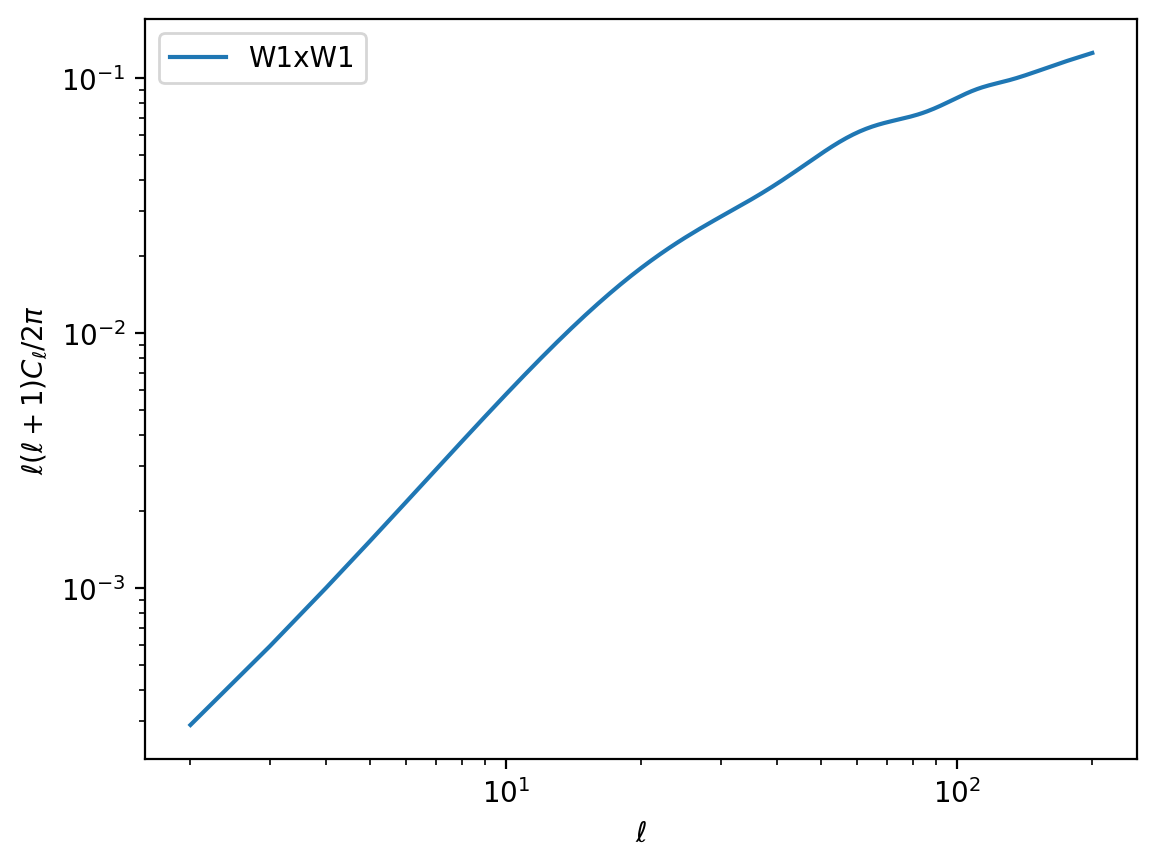

In [ ]:
for spectrum in ['W1xW1']:
    plt.loglog(ls, cls[spectrum][2:lmax+1], label=spectrum)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$')
plt.legend();

Text(0, 0.5, '$\\ell(\\ell+1)C_\\ell/2\\pi$')

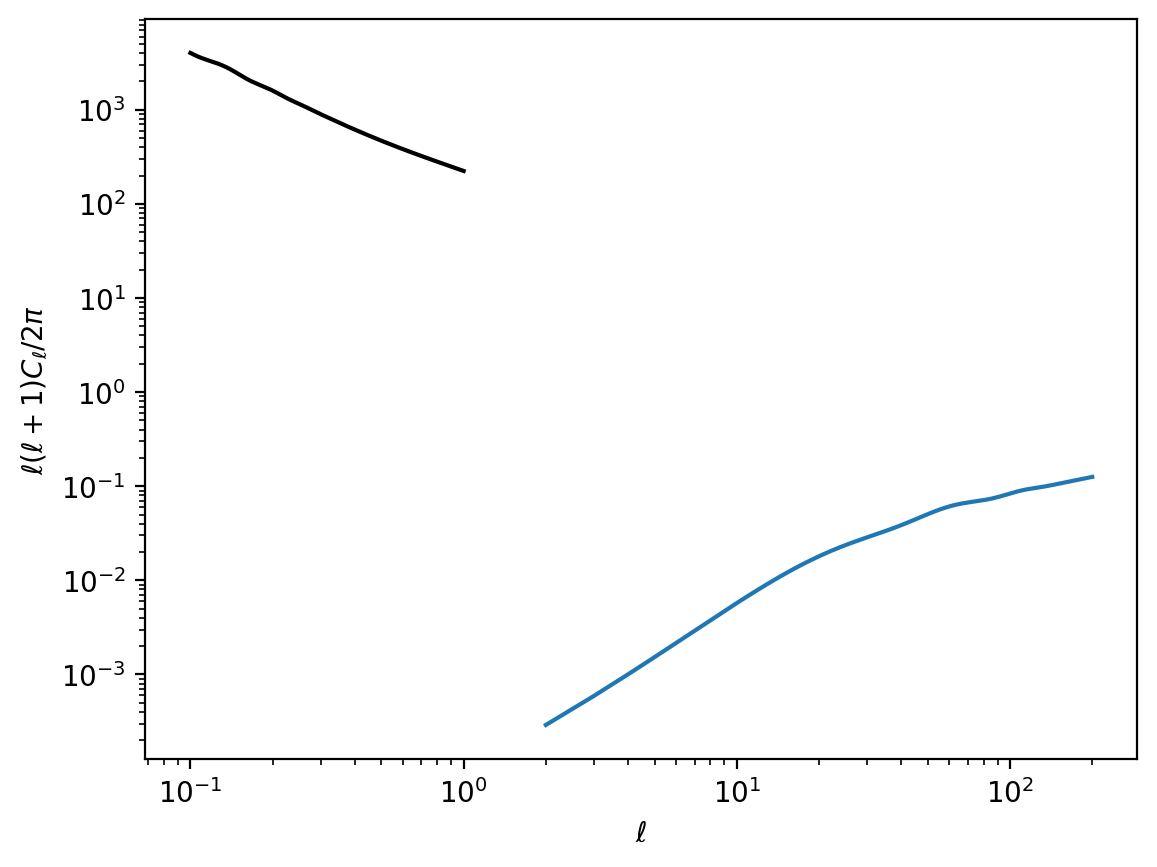

In [ ]:
for i, (redshift, line) in enumerate(zip(a2,['-','--'])):
    plt.loglog(kh2, PK2[i,:], color='k', ls = line)
for spectrum in ['W1xW1']:
    plt.loglog(ls, cls[spectrum][2:lmax+1], label=spectrum)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$')

In [ ]:
#z3
#Set up W(z) window functions, later labelled W1, W2. Gaussian here.
pars.SourceWindows = [GaussianSourceWindow(redshift = z3, source_type='counts', bias = b, sigma = 0.04, dlog10Ndm = 0)]
#power spectrun
pars.set_matter_power(redshifts=[z3], kmax=1000)
results = camb.get_results(pars)
kh3, a3 , PK3 = results.get_matter_power_spectrum(minkh=1e-1, maxkh=1, npoints=200)

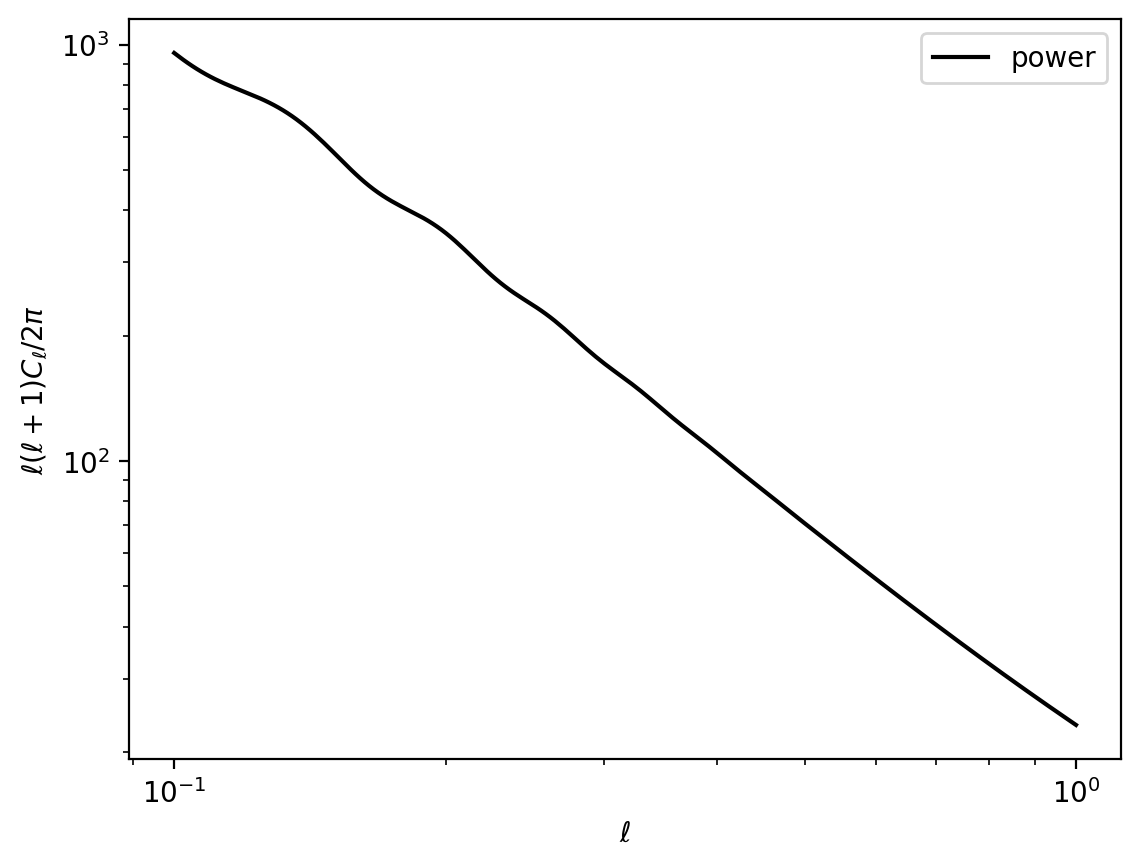

In [ ]:
for i, (redshift, line) in enumerate(zip(a3,['-','--'])):
    plt.loglog(kh3, PK3[i,:], color='k', ls = line)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$')
plt.legend(['power']);

In [ ]:
results = camb.get_results(pars)
cls = results.get_source_cls_dict()
ls =  np.arange(2, lmax+1)

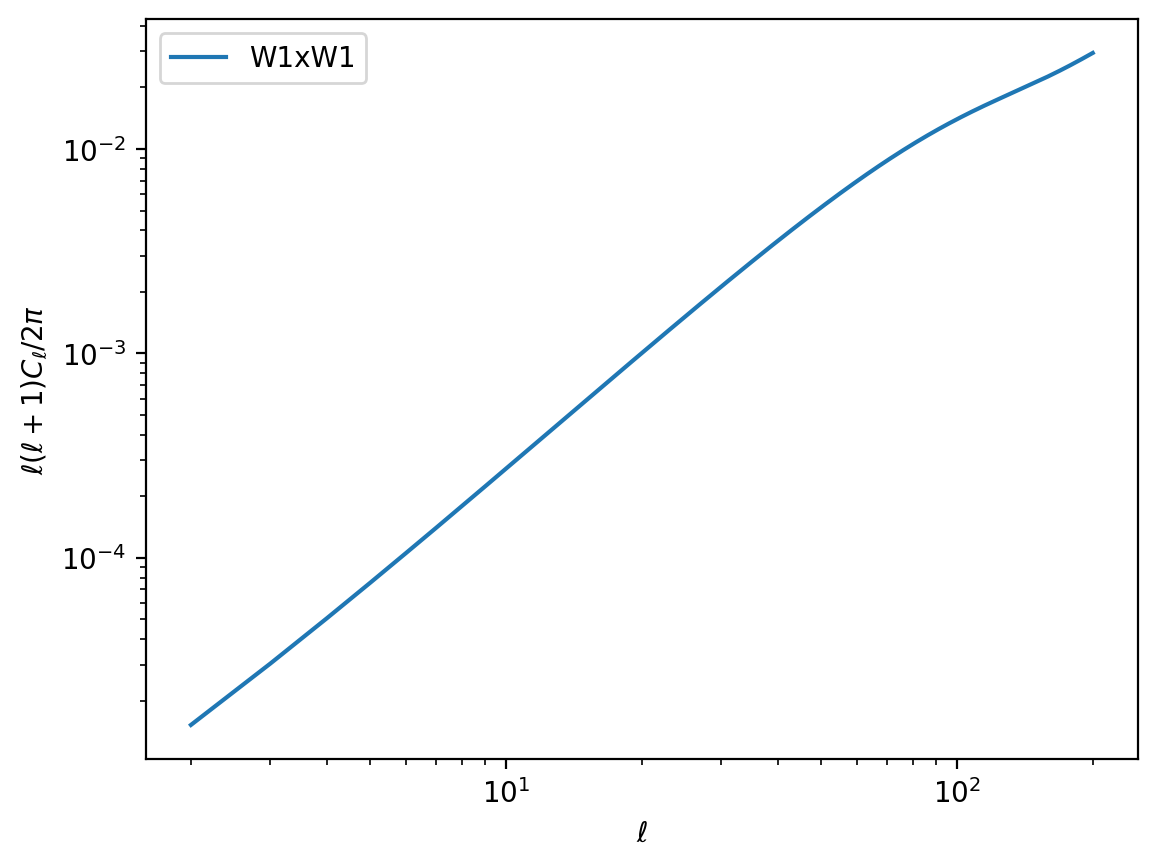

In [ ]:
for spectrum in ['W1xW1']:
    plt.loglog(ls, cls[spectrum][2:lmax+1], label=spectrum)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$')
plt.legend();

Text(0, 0.5, '$\\ell(\\ell+1)C_\\ell/2\\pi$')

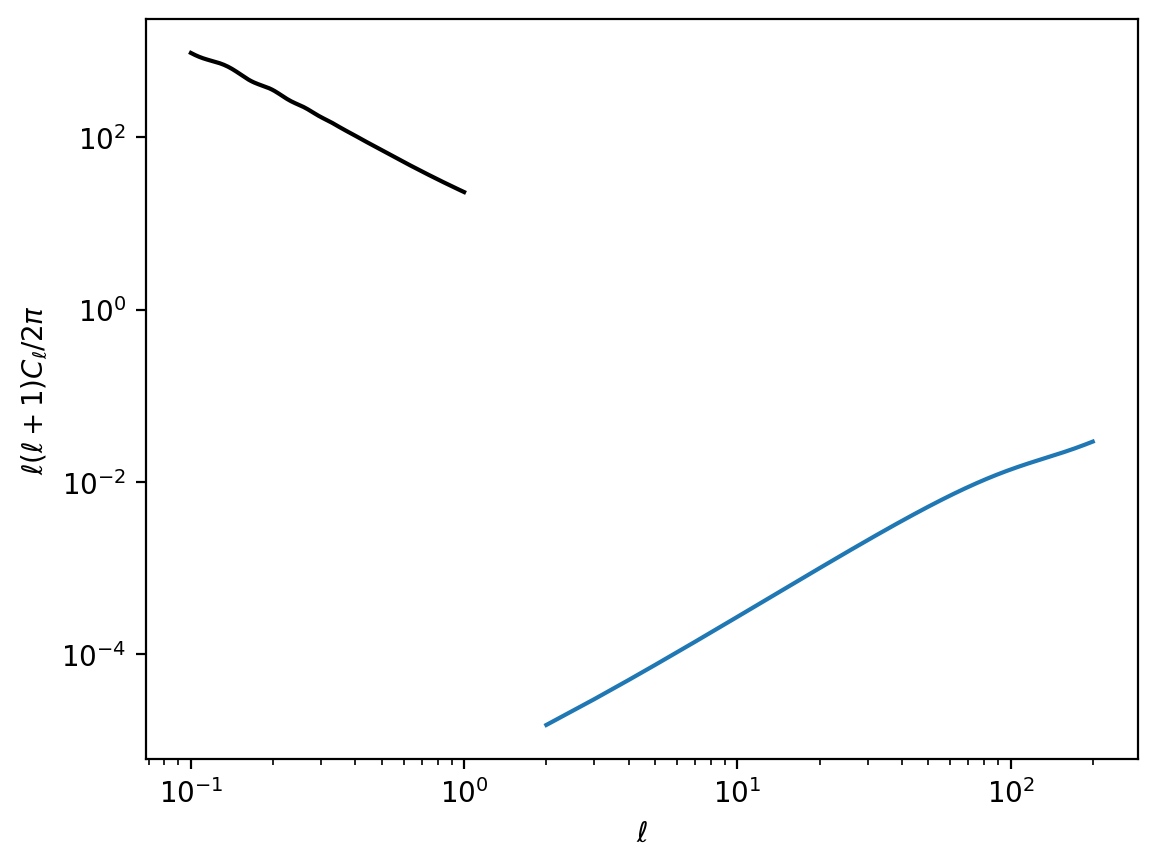

In [ ]:
for i, (redshift, line) in enumerate(zip(a3,['-','--'])):
    plt.loglog(kh3, PK3[i,:], color='k', ls = line)
for spectrum in ['W1xW1']:
    plt.loglog(ls, cls[spectrum][2:lmax+1], label=spectrum)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$')

In [ ]:
#b2
#Set up W(z) window functions, later labelled W1, W2. Gaussian here.
pars.SourceWindows = [GaussianSourceWindow(redshift = z, source_type='counts', bias = b2, sigma = 0.04, dlog10Ndm = 0)]
#power spectrun
pars.set_matter_power(redshifts=[z], kmax=1000)
results = camb.get_results(pars)
kh4, a4 , PK4 = results.get_matter_power_spectrum(minkh=1e-1, maxkh=1, npoints=200)

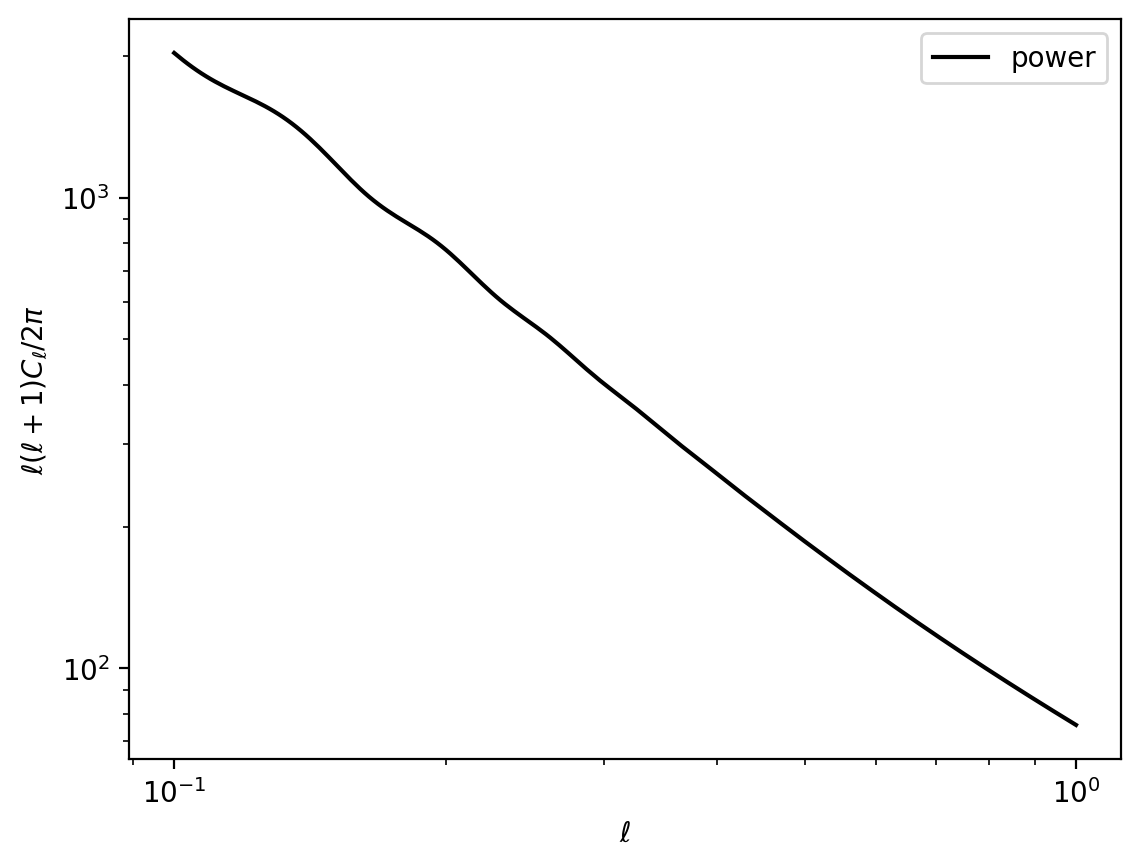

In [ ]:
for i, (redshift, line) in enumerate(zip(a4,['-','--'])):
    plt.loglog(kh4, PK4[i,:], color='k', ls = line)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$')
plt.legend(['power']);

In [ ]:
results = camb.get_results(pars)
cls = results.get_source_cls_dict()
ls =  np.arange(2, lmax+1)

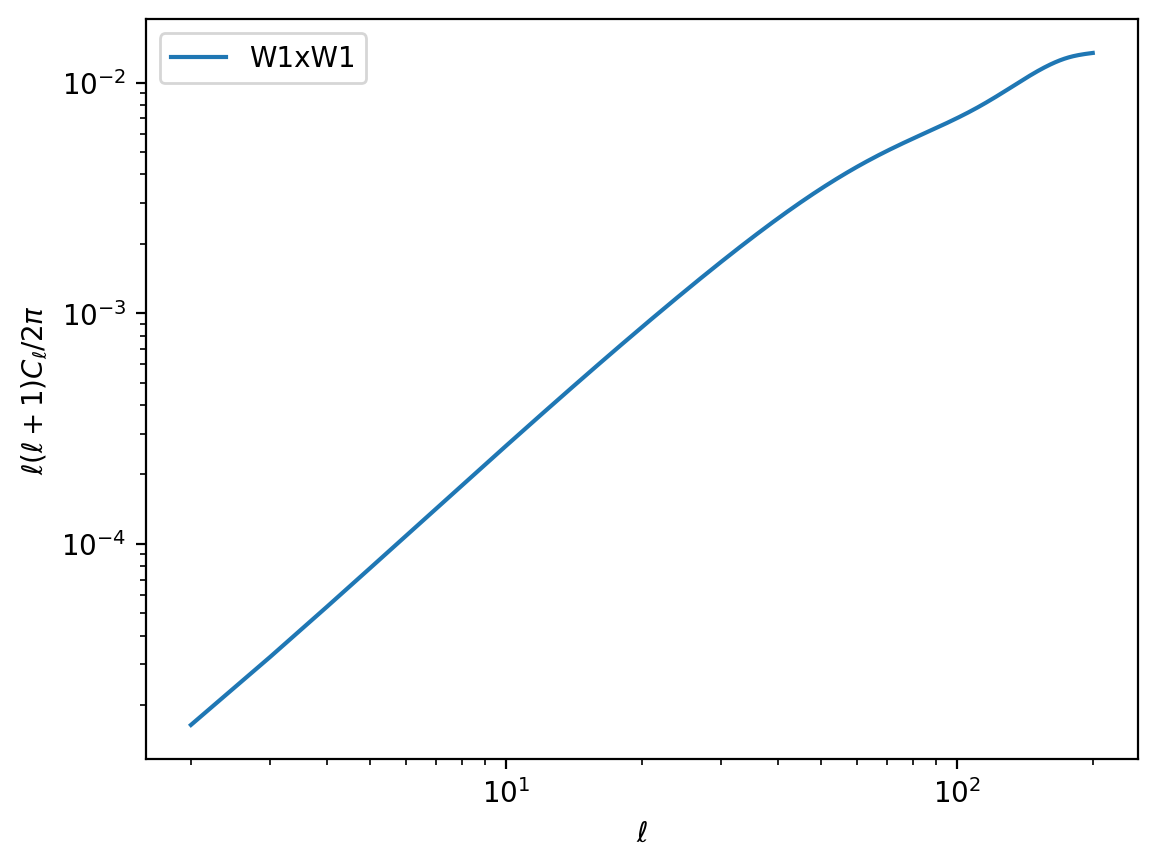

In [ ]:
for spectrum in ['W1xW1']:
    plt.loglog(ls, cls[spectrum][2:lmax+1], label=spectrum)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$')
plt.legend();

Text(0, 0.5, '$\\ell(\\ell+1)C_\\ell/2\\pi$')

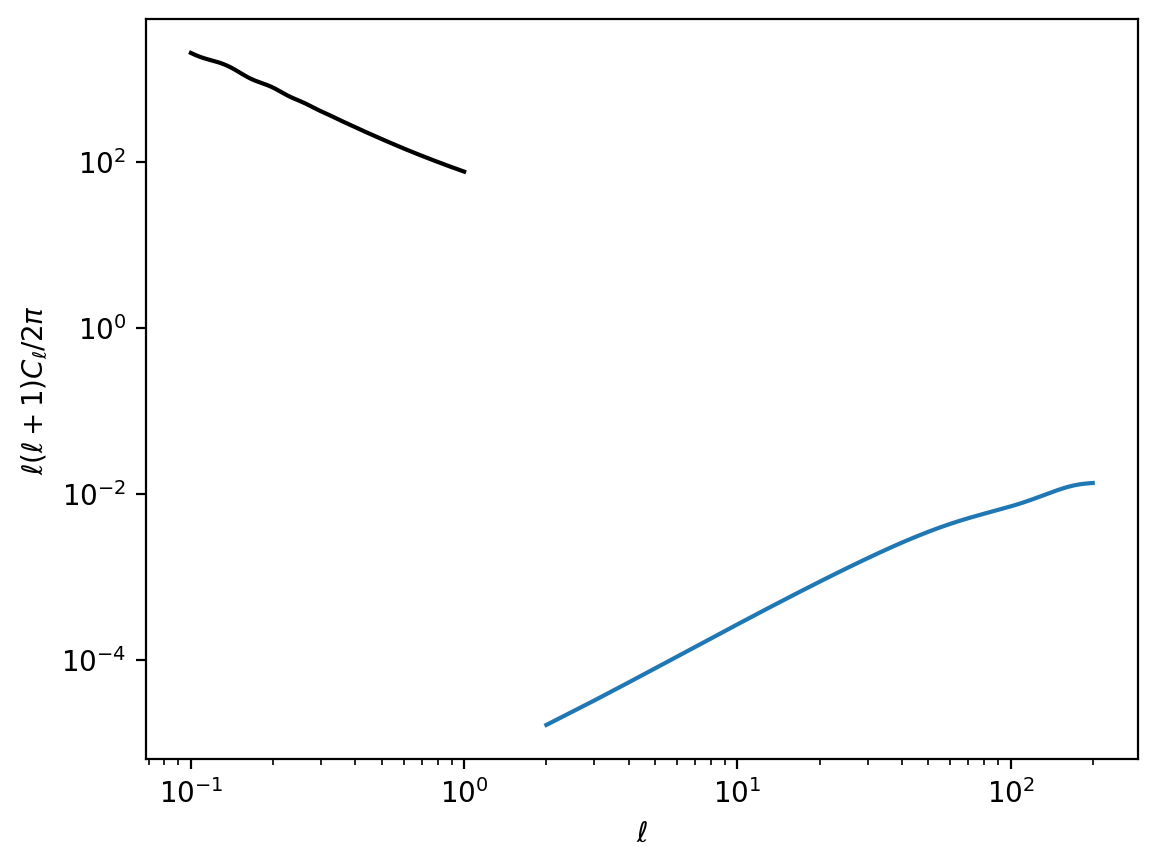

In [ ]:
for i, (redshift, line) in enumerate(zip(a4,['-','--'])):
    plt.loglog(kh4, PK4[i,:], color='k', ls = line)
for spectrum in ['W1xW1']:
    plt.loglog(ls, cls[spectrum][2:lmax+1], label=spectrum)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$')

In [ ]:
#b3
#Set up W(z) window functions, later labelled W1, W2. Gaussian here.
pars.SourceWindows = [GaussianSourceWindow(redshift = z, source_type='counts', bias = b3, sigma = 0.04, dlog10Ndm = 0)]
#power spectrun
pars.set_matter_power(redshifts=[z], kmax=1000)
results = camb.get_results(pars)
kh5, a5 , PK5 = results.get_matter_power_spectrum(minkh=1e-1, maxkh=1, npoints=200)

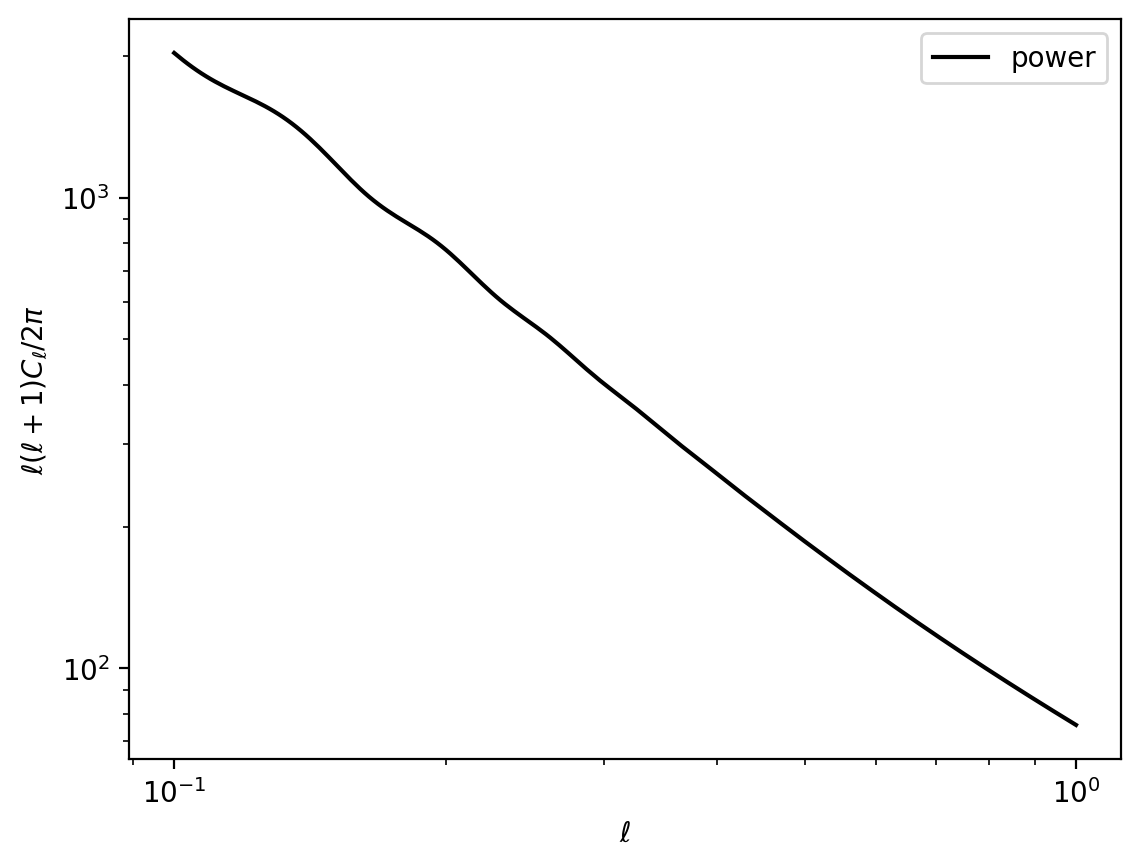

In [ ]:
for i, (redshift, line) in enumerate(zip(a5,['-','--'])):
    plt.loglog(kh5, PK5[i,:], color='k', ls = line)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$')
plt.legend(['power']);

In [ ]:
results = camb.get_results(pars)
cls = results.get_source_cls_dict()
ls =  np.arange(2, lmax+1)

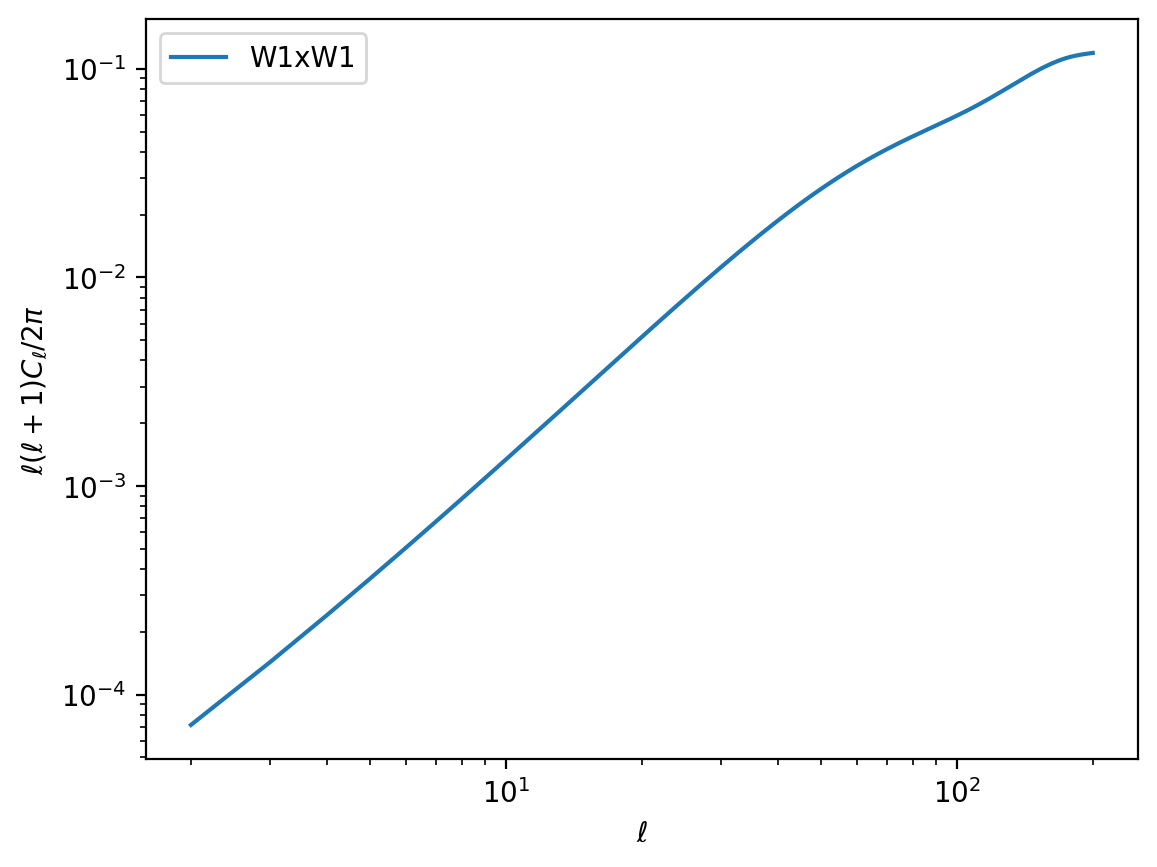

In [ ]:
for spectrum in ['W1xW1']:
    plt.loglog(ls, cls[spectrum][2:lmax+1], label=spectrum)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$')
plt.legend();

Text(0, 0.5, '$\\ell(\\ell+1)C_\\ell/2\\pi$')

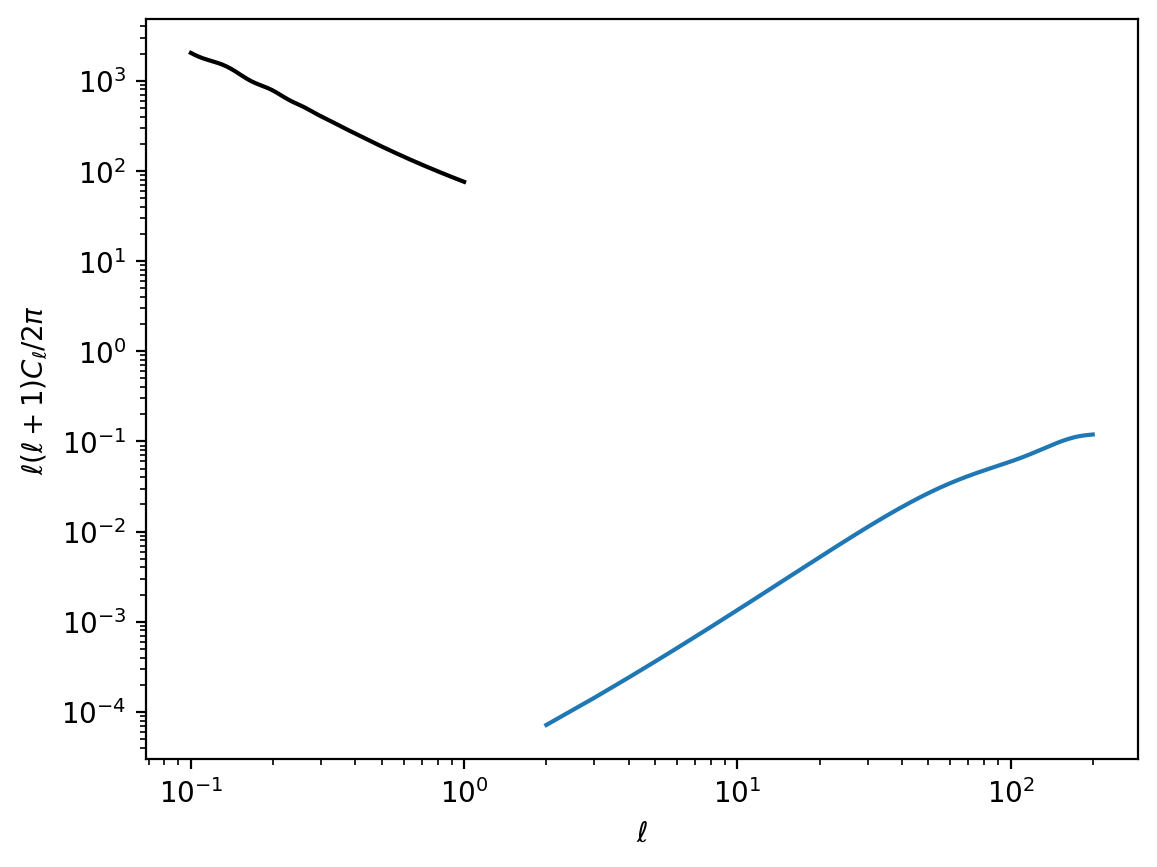

In [ ]:
for i, (redshift, line) in enumerate(zip(a5,['-','--'])):
    plt.loglog(kh5, PK5[i,:], color='k', ls = line)
for spectrum in ['W1xW1']:
    plt.loglog(ls, cls[spectrum][2:lmax+1], label=spectrum)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$')